### Connecting to an SQLite Database

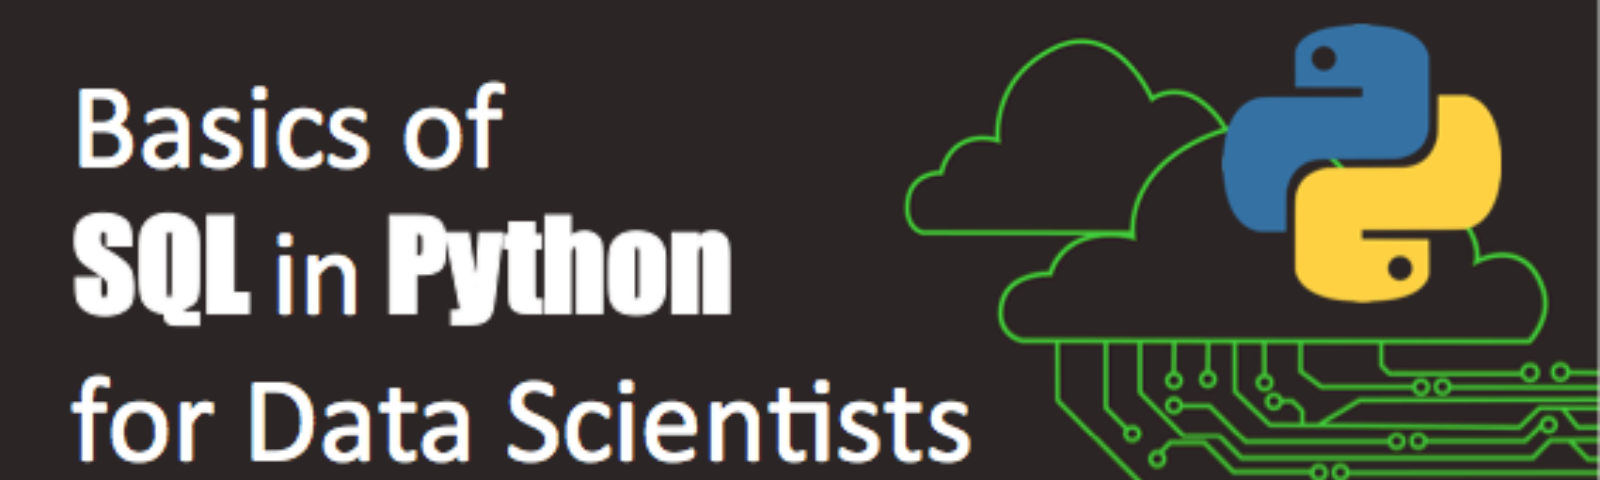

#### Importing Libraries

In [1]:
import pandas as pd
import sqlite3

In [2]:
# read csv files
df_train=pd.read_csv('/home/kumar/Documents/Projects and Practices/practice/Python practice/food/train.csv')
df_meal = pd.read_csv('/home/kumar/Documents/Projects and Practices/practice/Python practice/food/meal_info.csv')
df_center = pd.read_csv('/home/kumar/Documents/Projects and Practices/practice/Python practice/food/fulfilment_center_info.csv')

In [3]:
conn=sqlite3.connect('.\sql_db\food.db')

In [4]:
cur=conn.cursor()

In [ ]:
# load dataframes into database
df_train.to_sql("train", conn)
df_meal.to_sql('meal',conn)
df_center.to_sql('centers',conn)

In [5]:
#read table

df_meal=pd.read_sql_query('select * from meal;',conn)
df_meal.head()

,index,meal_id,category,cuisine
0,0,1885,Beverages,Thai
1,1,1993,Beverages,Thai
2,2,2539,Beverages,Thai
3,3,1248,Beverages,Indian
4,4,2631,Beverages,Indian


In [6]:
df_center=pd.read_sql_query('select * from centers;',conn)
df_center.head()

,index,center_id,city_code,region_code,center_type,op_area
0,0,11,679,56,TYPE_A,3.7
1,1,13,590,56,TYPE_B,6.7
2,2,124,590,56,TYPE_C,4.0
3,3,66,648,34,TYPE_A,4.1
4,4,94,632,34,TYPE_C,3.6


In [7]:
df_train=pd.read_sql_query('select * from train;',conn)
df_train.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1,1466964,1,55,1993,136.83,135.83,0,0,270
2,2,1346989,1,55,2539,134.86,135.86,0,0,189
3,3,1338232,1,55,2139,339.50,437.53,0,0,54
4,4,1448490,1,55,2631,243.50,242.50,0,0,40


#### Querying our SQLite Database Where clause

In [8]:
pd.read_sql_query(''' select * from meal 
where cuisine ='Indian'; ''',conn)

,index,meal_id,category,cuisine
0,3,1248,Beverages,Indian
1,4,2631,Beverages,Indian
2,16,1109,Rice Bowl,Indian
3,17,2290,Rice Bowl,Indian
4,26,2139,Beverages,Indian
5,33,2492,Desert,Indian
6,35,1727,Rice Bowl,Indian
7,36,1902,Biryani,Indian
8,37,1247,Biryani,Indian
9,38,2304,Desert,Indian


In [9]:
#using limit clause to check top 5 records in specific conditions with large records
pd.read_sql_query(''' 
select * from meal 
where category='Beverages'
limit 5;
''', conn)

,index,meal_id,category,cuisine
0,0,1885,Beverages,Thai
1,1,1993,Beverages,Thai
2,2,2539,Beverages,Thai
3,3,1248,Beverages,Indian
4,4,2631,Beverages,Indian


In [10]:
pd.read_sql_query('''
select max(num_orders) from train 
group by emailer_for_promotion;
''',conn)

,max(num_orders)
0,14229
1,24299
